<a href="https://colab.research.google.com/github/mkbahk/QuantumComputing/blob/main/IonQCloudAccessTest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!python -m pip install "qiskit-terra>=0.17.4"
!python3 -m pip install qiskit[visualization]
!python -m pip install qiskit-ionq

In [ ]:
from qiskit_ionq import IonQProvider
provider = IonQProvider("") #IonQ Cloud에서 Access Key를 복사해 넣어야 합니다.

# Show all backends:
print(provider.backends())

[<IonQSimulatorBackend('ionq_simulator')>, <IonQQPUBackend('ionq_qpu')>]


In [ ]:
#qpu_backend = provider.get_backend("ionq_simulator")
qpu_backend = provider.get_backend("ionq_qpu")

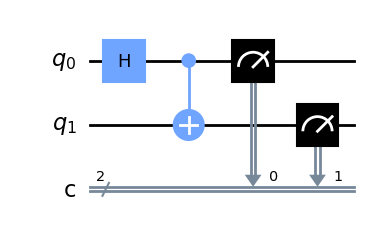

In [ ]:
from qiskit import QuantumCircuit
qc2 = QuantumCircuit(2, 2)
qc2.h(0)
qc2.cx(0, 1)
qc2.measure([0, 1], [0, 1])
qc2.draw('mpl')

In [ ]:
qpu_job = qpu_backend.run(qc2, shots=64) # if you don’t pass a shots kwarg, it defaults to 1024

In [ ]:
from qiskit.providers.jobstatus import JobStatus
import time
# Check if job is done
while qpu_job.status() is not JobStatus.DONE:
	print("Job status is", qpu_job.status() )
	time.sleep(5)

# grab a coffee! This can take up to a few minutes.
# once we break out of that while loop, we know our job is finished
print("Job status is", qpu_job.status() )
print(qpu_job.get_counts()) # these counts are the “true” counts from the actual QPU Run


Job status is JobStatus.INITIALIZING
Job status is JobStatus.QUEUED
Job status is JobStatus.QUEUED
Job status is JobStatus.QUEUED
Job status is JobStatus.QUEUED
Job status is JobStatus.QUEUED
Job status is JobStatus.QUEUED
Job status is JobStatus.QUEUED
Job status is JobStatus.QUEUED
Job status is JobStatus.QUEUED
Job status is JobStatus.QUEUED
Job status is JobStatus.QUEUED
Job status is JobStatus.QUEUED
Job status is JobStatus.QUEUED
Job status is JobStatus.QUEUED
Job status is JobStatus.QUEUED
Job status is JobStatus.QUEUED


KeyboardInterrupt: ignored

In [ ]:
print(qpu_job.get_counts())
print(qpu_job.get_probabilities())

{'00': 32, '11': 32}
{'00': 0.5, '11': 0.5}
